<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [6]:
sac_red = pd.read_csv(sac_csv)

In [7]:
sac_red

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [8]:
sac_red.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [9]:
sac_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [10]:
sac_red.sort_values('price').head(50)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337
580,59 E ST,LINCOLN,95648,CA,3,2,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885794,-121.290281
584,386 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886528,-121.288869
585,374 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886525,-121.288787
586,116 CRYSTALWOOD WAY,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886282,-121.289586
587,108 CRYSTALWOOD WAY,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886282,-121.289646
588,100 CRYSTALWOOD WAY,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886282,-121.289706
589,55 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884865,-121.289922


In [11]:
sac_red.loc[sac_red.index == 703, 'sq__ft'] = 984
sac_red.loc[sac_red.index == 703, 'price'] = 210944
sac_red.loc[sac_red.index == 703, 'latitude'] = 38.668433
sac_red.loc[sac_red.index == 703, 'longitude'] = 121.503471

In [12]:
# df3 = result[result['Value'] > 10] 
sac_red_fixed = sac_red[sac_red['price'] > 5000]
sac_red_fixed = sac_red_fixed[sac_red['beds'] > 0]
sac_red_fixed = sac_red_fixed[sac_red['baths'] > 0]
sac_red_fixed = sac_red_fixed[sac_red['sq__ft'] > 0]

C:\Users\colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [13]:
sac_red_fixed.sort_values('baths').head(50)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
203,2028 ROBERT WAY,SACRAMENTO,95825,CA,2,1,810,Residential,Tue May 20 00:00:00 EDT 2008,156000,38.609982,-121.419263
205,4524 LOCH HAVEN WAY,SACRAMENTO,95842,CA,2,1,904,Residential,Tue May 20 00:00:00 EDT 2008,157788,38.672730,-121.359645
207,4631 11TH AVE,SACRAMENTO,95820,CA,2,1,1321,Residential,Tue May 20 00:00:00 EDT 2008,161829,38.541965,-121.452132
746,1890 GENEVA PL,SACRAMENTO,95825,CA,3,1,1520,Residential,Fri May 16 00:00:00 EDT 2008,255000,38.599449,-121.400305
221,3949 WILDROSE WAY,SACRAMENTO,95826,CA,3,1,1174,Residential,Tue May 20 00:00:00 EDT 2008,195000,38.543697,-121.366683
229,4232 71ST ST,SACRAMENTO,95820,CA,2,1,723,Residential,Tue May 20 00:00:00 EDT 2008,207000,38.536741,-121.421150
235,6217 LEOLA WAY,SACRAMENTO,95824,CA,3,1,1360,Residential,Tue May 20 00:00:00 EDT 2008,222381,38.513066,-121.451909
242,2284 LOS ROBLES RD,MEADOW VISTA,95722,CA,3,1,1216,Residential,Tue May 20 00:00:00 EDT 2008,230000,39.008159,-121.036230
247,2125 22ND AVE,SACRAMENTO,95822,CA,3,1,1291,Residential,Tue May 20 00:00:00 EDT 2008,236250,38.534596,-121.493121


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

Square footage

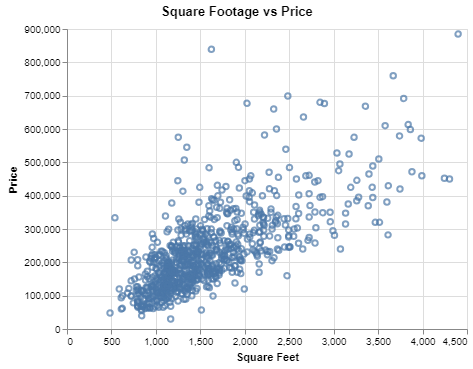

In [14]:
alt.Chart(sac_red_fixed).mark_point().encode(
    alt.X('sq__ft', title = 'Square Feet'),
    alt.Y('price', title = 'Price'),
    tooltip=['beds:Q', 'baths:Q']
    ).properties(
    title='Square Footage vs Price'
    ).interactive()
             
#              tooltip=['sum(A):Q', 'sum(B):Q']

Beds and or Baths count could be a consideration

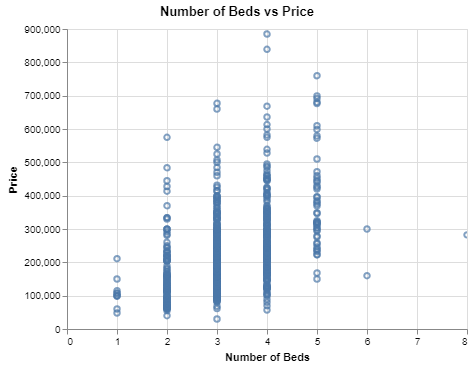

In [15]:
alt.Chart(sac_red_fixed).mark_point().encode(
    alt.X('beds', title = 'Number of Beds'),
    alt.Y('price', title = 'Price'),
    ).properties(
    title='Number of Beds vs Price'
    ).interactive()

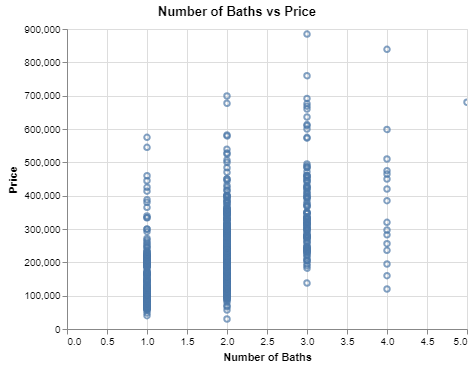

In [16]:
alt.Chart(sac_red_fixed).mark_point().encode(
    alt.X('baths', title = 'Number of Baths'),
    alt.Y('price', title = 'Price'),
    tooltip=('sq__ft')
    ).properties(
    title='Number of Baths vs Price'
    ).interactive()

We'll check area code just because - I would however excpet to see this represented in clusted of houses that are more expensive.  Since area code isn't a linearly changing variable it won't have a linear correlation.

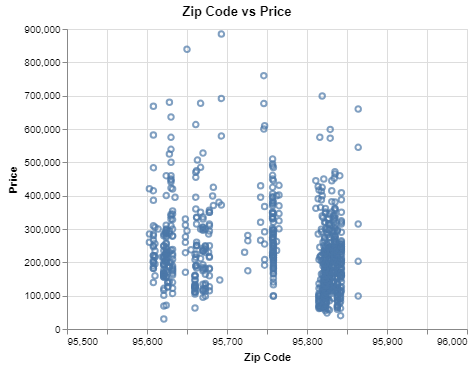

In [17]:
alt.Chart(sac_red_fixed).mark_point().encode(
    alt.X('zip', title = 'Zip Code', scale=alt.Scale(domain=[95500, 96000])),
    alt.Y('price', title = 'Price'),
    tooltip = ("zip")
    ).properties(
    title='Zip Code vs Price'
    ).interactive()

In [15]:
sac_red_fixed.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

Clearly the best variable to use is Square Footage.  It is the only one that shows real linear correlation.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [16]:
sac_red_fixed['price'].values.reshape(-1, 1).shape

(813, 1)

In [17]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(sac_red_fixed['sq__ft'].values.reshape(-1, 1), sac_red_fixed['price'].values.reshape(-1, 1))
linreg.coef_

array([[ 134.64083994]])

In [18]:
# calculating SSE np.sum(np.square(df['Y'] - df['Mean_Yhat']))

from sklearn.linear_model import LinearRegression

def coef_calc(X, Y):
    X = X.values.reshape(-1, 1)
    Y = Y.values.reshape(-1, 1)
    linreg = LinearRegression()
    linreg.fit(X, Y)
    
    print('Slope:', float(linreg.coef_))
    print('Intercept:', float(linreg.intercept_))
    return [float(linreg.coef_), float(linreg.intercept_)]

In [19]:
coef_calc(sac_red_fixed['sq__ft'], sac_red_fixed['price'])

Slope: 134.64083993681115
Intercept: 16195.545596351643


[134.64083993681115, 16195.545596351643]

In [20]:
slope_and_int = coef_calc(sac_red_fixed['sq__ft'], sac_red_fixed['price'])

Slope: 134.64083993681115
Intercept: 16195.545596351643


In [21]:
slope_and_int

[134.64083993681115, 16195.545596351643]

### 6. Interpret the intercept. Interpret the slope.

The slope shows that for every square foot of space, the price should increase by $ 134.64.
The intercept shows that the base price to start at with this model is $ 16,195.55.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

To use this for prediction, you can determine the expected value of a home you are building based off of the size that you are building the home.

To use this for inference, you can guess the price of a home based off of its size.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [22]:
# line_data = []

# for x in (range(1,4500)):
#     i = x * slope_and_int[0] + slope_and_int[1]
#     line_data.append(i)

In [23]:
X1 = sac_red_fixed['sq__ft'].values.reshape(-1, 1)
Y1 = sac_red_fixed['price'].values.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(X1, Y1)
exp_price = linreg.predict(X1).flat
true_price = sac_red_fixed['price']

In [24]:
sq_ft_df = pd.DataFrame({'x': range(1, 4500)})
sq_ft_df['expected_price'] = linreg.predict(pd.DataFrame({'x': range(1, 4500)}))

In [25]:
sq_ft_df

,x,expected_price
0,1,16330.186436
1,2,16464.827276
2,3,16599.468116
3,4,16734.108956
4,5,16868.749796
5,6,17003.390636
6,7,17138.031476
7,8,17272.672316
8,9,17407.313156
9,10,17541.953996


In [26]:
resd_price = true_price - exp_price

In [27]:
sac_red_fixed['resd'] = resd_price

In [28]:
linreg.score(X1, Y1)

0.53091910558700728

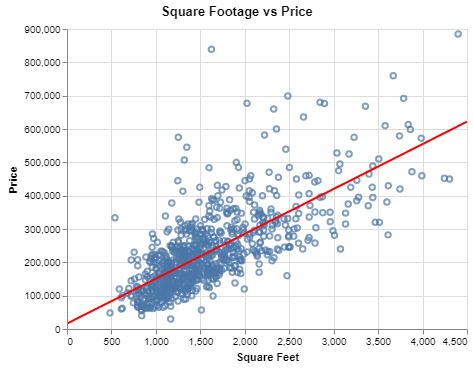

In [29]:
sq_scatter = (alt.Chart(sac_red_fixed).mark_point().encode(
    alt.X('sq__ft', title = 'Square Feet'),
    alt.Y('price', title = 'Price'),
    tooltip=['beds:Q', 'baths:Q']
    ).properties(
    title='Square Footage vs Price'
    ).interactive()
)

sq_line = (alt.Chart(sq_ft_df).mark_line(color='red').encode(
    x='x',
    y='expected_price',
)
)

sq_scatter + sq_line   


---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [30]:
sac_red_fixed.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,resd
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,-69533.287784
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,-105109.405803
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,-54489.654186
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,-61602.541223
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,-41604.295026


In [31]:
pd.get_dummies(sac_red_fixed, columns=['type'])

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,resd,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,-69533.287784,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,-105109.405803,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,-54489.654186,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,-61602.541223,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,-41604.295026,0,0,1
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,-77341.568005,1,0,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,-73944.032887,0,0,1
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,-83665.814202,0,0,1
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,-47987.575977,1,0,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,-71556.948164,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

I don't have an "unknown" in my variables?

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [32]:
sac_red_dummies = pd.get_dummies(sac_red_fixed, columns=['type'])

In [33]:
sac_red_dummies

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,resd,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,-69533.287784,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,-105109.405803,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,-54489.654186,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,-61602.541223,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,-41604.295026,0,0,1
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,-77341.568005,1,0,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,-73944.032887,0,0,1
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,-83665.814202,0,0,1
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,-47987.575977,1,0,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,-71556.948164,0,0,1


In [34]:
# data = load_boston()
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df['MDEV'] = data['target']

# X = df[["CRIM", "CHAS", "NOX"]]
# y = df['MDEV']

# ## Code up different model here to show effect of using all vs some variables, boston housing?
# model = LinearRegression()
# model.fit(X, y)
# yhat = model.predict(X)
# df['y_hat'] = yhat

In [35]:
Y1

array([[ 59222],
       [ 68212],
       [ 68880],
       [ 69307],
       [ 81900],
       [ 89921],
       [ 90895],
       [ 91002],
       [ 94905],
       [ 98937],
       [100309],
       [106250],
       [106852],
       [107502],
       [108750],
       [110700],
       [113263],
       [116250],
       [120000],
       [121630],
       [122000],
       [122682],
       [123000],
       [124100],
       [125000],
       [126640],
       [127281],
       [129000],
       [131200],
       [132000],
       [133000],
       [134555],
       [136500],
       [138750],
       [141000],
       [146250],
       [147308],
       [148750],
       [149593],
       [150000],
       [152000],
       [154000],
       [156896],
       [161250],
       [161500],
       [164000],
       [165000],
       [166357],
       [166357],
       [168000],
       [170000],
       [173000],
       [174250],
       [174313],
       [178480],
       [178760],
       [179580],
       [181000],
       [181872

In [36]:
X_new = sac_red_dummies[["sq__ft", "beds", 'type_Residential']]
new_model = LinearRegression()
new_model.fit(X_new, Y1)
yhat_new = new_model.predict(X_new)
new_model.score(X_new, Y1)


0.55064335929247066

In [37]:
new_model.coef_

array([[   156.82738827, -25976.31923065,  40243.40648367]])

From iterating though a few different combinatiosn and variables, it looks to be that the best three variables are:

- Square footage
- Number of Beds
- Dummy variable on Residential address

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [38]:
yhat_new.shape

(813, 1)

In [39]:
new_model_intercept = new_model.intercept_

In [40]:
new_model_coefs = new_model.coef_
new_model_coefs

array([[   156.82738827, -25976.31923065,  40243.40648367]])

In [65]:
sac_red_dummies = sac_red_dummies.reset_index()

In [73]:
new_model_df = pd.DataFrame({'x': range(1, 72000)})
new_true_price = []

# for sq_ftg in (sac_red_dummies['sq__ft']):
#     house_price = 0
#     house_price = sq_ftg * new_model_coefs[0, 0] + new_model_intercept
#     for beds in (sac_red_dummies['beds']):
#         house_price += beds * new_model_coefs[0, 1]
#         for housetype in (sac_red_dummies['type_Residential']):
#             house_price += housetype * new_model_coefs[0, 2]
#     new_true_price.append(house_price)        
    
# for sq_ftg, beds, housetype in (sac_red_dummies['sq__ft', 'beds', 'type_Residential']):
#     house_price = 0
#     house_price = ((sq_ftg * new_model_coefs[0, 0]) + 
#                    (new_model_intercept) + 
#                    (beds * new_model_coefs[0, 1]) + 
#                    (housetype * new_model_coefs[0, 2])
#                   )
#     new_true_price.append(house_price)    
    
for index, price in enumerate(sac_red_dummies.sq__ft):
    house_price = 0
    house_price = ((sac_red_dummies.sq__ft[index] * float(new_model_coefs[0, 0])) + 
                   (sac_red_dummies.beds[index] * float(new_model_coefs[0, 1])) + 
                   (sac_red_dummies.type_Residential[index] * float(new_model_coefs[0, 2])) +
                   (float(new_model_intercept))
                  )
    new_true_price.append(house_price)


# new_model_df['expected_price'] = new_model.predict(X_new)

In [67]:
len(new_true_price)

813

In [74]:
new_true_price

[147173.75929752452,
 173107.30558356413,
 140900.66376680648,
 149682.99750981177,
 141057.49115507444,
 125806.66662783446,
 163227.1801226832,
 174675.57946624362,
 123397.22858198754,
 169813.93042993714,
 132645.83941043276,
 192240.24695225415,
 178639.03711755507,
 150053.67950817532,
 176343.65351536346,
 153664.91451770213,
 148428.37840366818,
 100500.42989486668,
 108280.56700707268,
 202747.68196620687,
 165422.76355843453,
 172537.02325231998,
 158579.38569647234,
 241170.39209185488,
 131391.22030428913,
 160717.94191039598,
 141114.5183769021,
 165579.59094670246,
 180535.22005398548,
 185810.32403326817,
 138766.31263224676,
 170754.89475954487,
 206511.53928463769,
 165109.10878189863,
 138766.31263224676,
 212470.98003881983,
 159776.97758078828,
 194963.33977463699,
 143837.61119928493,
 120987.79053614062,
 180325.57052325376,
 179380.40111428217,
 155699.46548582157,
 179637.02866899042,
 212998.48942545138,
 139760.09910431821,
 211900.69770757572,
 270710.9683080

In [75]:
sac_red_dummies['predicted_price'] = new_true_price

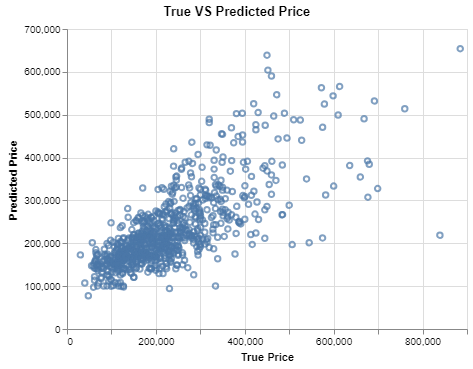

In [78]:
tvp_scatter = (alt.Chart(sac_red_dummies).mark_point().encode(
    alt.X('price', title = 'True Price'),
    alt.Y('predicted_price', title = 'Predicted Price'),
    tooltip=['sq__ft', 'beds:Q', 'type_Residential:Q']
    ).properties(
    title='True VS Predicted Price'
    ).interactive()
)  
tvp_scatter

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_k$. **same**
2. **Independence of Errors:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0. **same**
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.) **same**
5. **Independence of Predictors**: The independent variables $X_k$ and $X_l$ must be independent of one another for any $k \ne l$.

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

Normality is most likely met in this model - housing prices tend to follow a normal distrubition as do the error

Linearity - the values picked all have generally a linear relationship with the price.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [82]:
def r2_adj (X, y):
    yhat = model.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(r_squared, adjusted_r_squared)

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [93]:
def reg_metrics (X, y):
    model = LinearRegression()
    model.fit(X, y)
    print('Variance Score:', explained_variance_score(model.predict(X), y))
    print('Mean Asolute Error:', mean_absolute_error(model.predict(X), y))
    print('Mean Squared Error:', mean_squared_error(model.predict(X), y))
    print('Median Absolute Error:', median_absolute_error(model.predict(X), y))
    print('Mean Squared Log Error:', mean_squared_log_error(model.predict(X), y))
    print('R Squared Score:', r2_score(model.predict(X), y))   
    

In [104]:
reg_metrics(X_test, Y_test)

Variance Score: 0.162055500964
Mean Asolute Error: 58288.7665894
Mean Squared Error: 6517042736.86
Median Absolute Error: 46366.338831
Mean Squared Log Error: 0.123575564216
R Squared Score: 0.162055500964


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [106]:
X_test = sac_red_fixed[['sq__ft']]
Y_test = sac_red_fixed['price']

In [107]:
reg_metrics(X_test, Y_test)

Variance Score: 0.116473885613
Mean Asolute Error: 59294.6548675
Mean Squared Error: 6705257367.93
Median Absolute Error: 47669.3284604
Mean Squared Log Error: 0.122550730018
R Squared Score: 0.116473885613


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

HIGH VARIANCE OH MY LORD IS IT HIGH.  HIGH THAN SNOOP MID APRIL.